# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

> En el paso 1, se realizará la limpieza de los datos, empezando por la lectura de cada uno de los archivos de datos y posteriormente se le realizará el analisis inicial en donde observaremos los tipos de datos, cantidad de filas, columnas y valores vacios. Esto nos dará un punto de partida para despues pasar al analisis detallado de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';') 

In [3]:
# mostrar información del DataFrame

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame

products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame

departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame

order_products.info()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

#Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En primer lugar, se puede inferir que los datos estan delimitados por punto y coma, por ende es importante indicar en el código el parámetro (sep=';'). Para hacer más facil el analisis especificare lo que se encontró por cada una de los archivos:

**orders** = Es un DataFrame o tabla de pandas, con indices que van desde 0 hasta 478966, indicando un total de 478967 filas, además tiene 6 columnas, de las cuales las primeras 5 columnas  no cuentan con valores Nulos o vacíos y son de tipo entero. La última columna days_since_prior_order si tiene valores nulos y es de tipo flotante. Por último, la cantidad de memoria que esta utilizando este archivo es 21.9 megabytes.

**products** = Es un DataFrame o tabla de pandas, con indices que van desde 0 to 49693 indicando un total de 49694 filas, contiene 4 columnas, de las cuales 3 de ellas  no cuentan con valores Nulos o vacíos y son de tipo object. La columna product_name, si tiene valores nulos y es de tipo flotante. Por último, la cantidad de memoria que esta utilizando este archivo es 1.5 megabytes.


**aisles** = Es un DataFrame o tabla de pandas, con indices que van desde 0 to 133indicando un total de 134 filas, contiene 2 columnas sin  valores Nulos o vacíos. Sin embargo, la primera: La primera: aisle_id  es de tipo entero y la segunda: aisle es de tipo object. Por último, la cantidad de memoria que esta utilizando este archivo es 2.2 megabytes.

**departments** = Es un DataFrame o tabla de pandas, con indices que van desde 0 to 20 indicando un total de 21 filas, contiene 2 columnas sin  valores Nulos o vacíos. Sin embargo, la primera: La primera: department_id es de tipo entero y la segunda department es de tipo object. Por último, la cantidad de memoria que esta utilizando este archivo es 464 bytes.


**order_products** = Es un DataFrame o tabla de pandas, con indices que van desde 0 to 4545006, indicando un total de 4545007 filas, contiene 3 columnas sin  valores Nulos o vacíos. Tiene 3 columnas de tipo entero y la columna: add_to_cart_order, es de tipo flotante. Por último, la cantidad de memoria que esta utilizando este archivo es 138.7 megabytes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor para el Paso 1: Descripción de los datos</b> <a class="tocSkip"></a>
Has realizado un buen trabajo en la importación y descripción inicial de los datos:

Importaste correctamente las librerías necesarias y leíste los archivos CSV con el separador adecuado.
Utilizaste de manera efectiva el método info() para cada DataFrame.
Tus conclusiones son detalladas y muestran una buena comprensión de cada conjunto de datos.

Áreas de mejora:

Podrías haber incluido el uso de describe() para obtener estadísticas descriptivas de las columnas numéricas.
Considera usar head() para mostrar las primeras filas de cada DataFrame y obtener una vista rápida de los datos.

En general, has demostrado una sólida comprensión de cómo abordar la descripción inicial de los datos.
</div>


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

> En la etapa de Preprocesamiento de datos es crucial para los analistas de datos, ya que en esta etapa se preparan los datos en un formato adecuado, se eliminan errores, para despues estandarizar los datos para su posterior analisis.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [9]:
orders.duplicated().sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

> Si, encontre valores duplicados especificamente en la columna día de la semana, en donde el día miercoles que es el numer 3 se encontraron los duplicados, problamente ese día hubo una falla en el sistema. 

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

pedidos_miercoles = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print("Pedidos que se hicieron el miércoles a las 2:00 a.m.:")
print(pedidos_miercoles)

Pedidos que se hicieron el miércoles a las 2:00 a.m.:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
515

¿Qué sugiere este resultado?

> Este resultado sugiere que si bien los miercoles, son los dias con valores duplicados, las personas duran varios días en volver a realizar pedidos 

In [11]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace = True)
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [12]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()


0

In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
orders[orders['order_id'].duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos

>Usé el método duplicated() para determinar los valores duplicados, los cuales se encuentran los días miercoles de la semana y posterior a esto los elimine con el metodo drop_duplicates. 

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()]


,product_id,product_name,aisle_id,department_id


In [15]:
# Verifica si hay IDs duplicadas de productos
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

# Convertir los nombres de productos a letras mayúsculas

products['product_name'].str.upper()


0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'].str.upper().duplicated().sum()

1361

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Con la realización de este ejercicio se obtuvo un resultado de 1361 productos duplicados de la columna products. 

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
departments[departments.duplicated()]

,department_id,department


In [19]:
# Revisa si hay IDs duplicadas de productos
departments[departments.duplicated(subset='department_id')]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Con la realización de este duplicated, nos damos cuenta que en las columnas del archivo 'department' no hay datos duplicados 

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles[aisles.duplicated()]

,aisle_id,aisle


In [21]:
# Revisa si hay IDs duplicadas de productos
aisles[aisles.duplicated(subset='aisle_id')]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Con la realización de este duplicated, nos damos cuenta que en las columnas del archivo 'aisles' no hay datos duplicados 

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products.duplicated(subset='order_id')]

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Con la función duplicated() podemos obtener los datos duplicados, pero al realizar el primer ejercicio, no obtenemos datos duplicados. Por eso es importante revisar cuidadosamente los datos ya que podemos tener datos engañosos, para esto analizamos solamente si hay duplicados en la columna 'order_id' y sí obtuvimos duplicados. La función duplicated(subset='order_id') busca duplicados únicamente en la columna order_id, sin considerar otras columnas. Esto puede ser útil para ver si hay pedidos que aparecen más de una vez en el DataFrame. Esto significa que cada order_id podría aparecer varias veces.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'

products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

>En primer lugar, se utilizó .isna()  para localizar las filas en el DataFrame 'products' donde la columna product_name tiene valores ausentes (es decir, NaN o "Not a Number"), obteniendo como resultado 1258 filas con valores ausentes.  

In [25]:
products['product_name'].isna().sum()

1258

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] !=100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

>Todos los valores nulos o vacios de la columna 'product_name' vienen del pasillo 100 y el departamento 21

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] !=21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# Filtrar el pasillo con ID 100
pasillo_id = 100
pasillo_info = aisles[aisles['aisle_id'] == pasillo_id]

print("Información del pasillo con ID 100:")
pasillo_info

Información del pasillo con ID 100:


,aisle_id,aisle
99,100,missing


In [29]:
# Filtrar el departamento con ID 21
departamento_id = 21
departamento_info = departments[departments['department_id'] == departamento_id]
print("\nInformación del departamento con ID 21:")

departamento_info


Información del departamento con ID 21:


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

>Esto significa que tamto en la fila 100 de 'aisle' y la fila 21 de 'departments' hay valores que faltantes o que probablemente tienen un error. 

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'
products.fillna('Unknown')

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [31]:
products.fillna('Unknown', inplace = True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

>En este apartado rellenamos los valores ausentes por la palabra 'Unknown', esto con el fin de poder procesar más facilmente nuestros datos. 

In [32]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [34]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [35]:
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [36]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] !=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.
>Esto significa que solo los valores ausentes se encuentran en la columna 'order_number' en la 1 orden y esto es logico ya que como son la primera compra, pues no hay datos de compras anteriores, por ende no se pueden comparar. 

In [37]:
orders.fillna(0, inplace=True)

In [38]:
orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

### `order_products` data frame

In [39]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [40]:
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].min()

1.0

In [42]:
order_products['add_to_cart_order'].max()

64.0

Describe brevemente cuáles son tus hallazgos.

> Hay 836 valores ausentes en la columna 'add_to_cart_order'. Ademas revisando dicha columna, se puede identificar que las personas añaden desde 1 producto hasta 64 productos. 

In [43]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

orders_id_faltantes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_id_faltantes =sorted(list(orders_id_faltantes))
orders_id_faltantes

[9310,
 61355,
 102236,
 129627,
 165801,
 171934,
 180546,
 264710,
 293169,
 388234,
 404157,
 678116,
 733526,
 747668,
 813364,
 844733,
 854647,
 871281,
 888470,
 903110,
 936852,
 1021563,
 1038146,
 1169835,
 1183255,
 1220886,
 1302315,
 1308785,
 1386261,
 1477139,
 1529171,
 1564093,
 1598369,
 1625713,
 1633337,
 1648217,
 1673227,
 1677118,
 1713430,
 1717990,
 1730767,
 1800005,
 1832957,
 1888628,
 1916118,
 1959075,
 1961723,
 1968313,
 2094761,
 2136777,
 2170451,
 2256933,
 2409109,
 2449164,
 2470674,
 2479011,
 2621907,
 2625444,
 2652650,
 2721963,
 2729254,
 2849370,
 2926893,
 2979697,
 2997021,
 2999801,
 3125735,
 3308010,
 3347453,
 3383594]

In [44]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

order_products.groupby('order_id')['product_id'].count()

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [45]:
order_products.groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

Describe brevemente cuáles son tus hallazgos.
> Al agrupar los pedidos con el número de productos, se identifica que hay una order con 127 productos, lo cual no hace referencia al punto anterior en donde encontramos 64 productos. Esto puede ser una falla en el sistema, ya que hay un gap entre el 65 y el 127 

In [46]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Todas las ordenes donde el 'add_to_cart' es nulo:

order_products[order_products['order_id'].isin(orders_id_faltantes)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [47]:
order_products[order_products['order_id'].isin(orders_id_faltantes)].groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

In [48]:
order_products['add_to_cart_order'] =order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
> Al realizar estos codigos, se puede identificar que los NaN de la columna 'add_to_cart_order' son de ordenes que superaron los nùmeros desde el 65 hasta los 127. Posteriormente, para un mejor analisis de los datos se reemplaza los valores nulos por un valor muy grande, en este caso: 999, int. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


<div class="alert alert-block alert-success">
<b>Comentario del revisor para el Paso 2: Preprocesamiento de los datos</b> <a class="tocSkip"></a>
Tu enfoque para el preprocesamiento es metódico y cubre todos los aspectos requeridos:

Buen trabajo al verificar y manejar los duplicados en cada DataFrame.
Excelente manejo de valores nulos, especialmente en la columna 'product_name' y 'days_since_prior_order'.
Buena decisión de reemplazar los valores nulos en 'add_to_cart_order' con 999.

Puntos destacados:

Buena investigación de los patrones en los valores nulos antes de tomar decisiones.
Excelente uso de métodos como isna(), fillna() y value_counts() para manejar los datos.

Áreas de mejora:

Podrías haber proporcionado más explicaciones sobre el impacto de tus decisiones de preprocesamiento en el análisis posterior.

</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [50]:
compras_hora_dia = orders['order_hour_of_day'].value_counts().sort_index()
compras_hora_dia

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

Escribe aquí tus conclusiones



### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [51]:
import matplotlib.pyplot as plt

In [52]:
type(compras_hora_dia)

pandas.core.series.Series

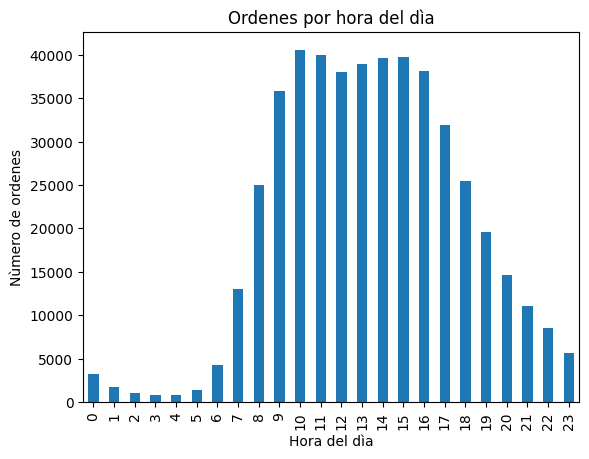

In [53]:
compras_hora_dia.plot(
    kind='bar',
    title='Ordenes por hora del dìa',
    xlabel= 'Hora del dìa',
    ylabel= 'Nùmero de ordenes'
)
plt.show()

Escribe aquí tus conclusiones
>Con la realización de este grafico, se puede intepretar que la mayor cantidad de pedidos se realizan entre las 10 am y 4 pm. 

### [A3] ¿Qué día de la semana compran víveres las personas?

In [54]:
pedidos_por_dia_semana = orders['order_dow'].value_counts().sort_index()
pedidos_por_dia_semana

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

In [55]:
import matplotlib.pyplot as plt

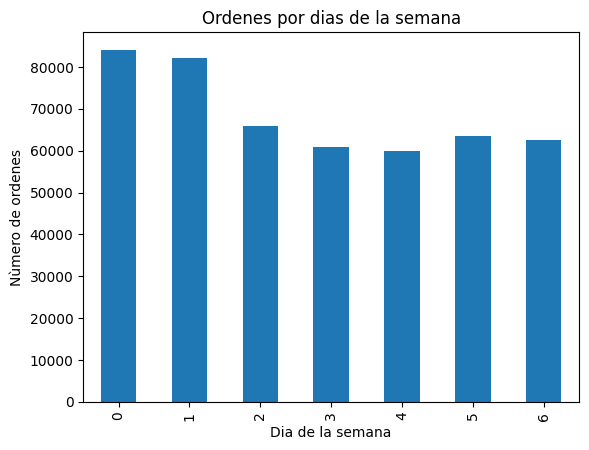

In [56]:
pedidos_por_dia_semana.plot(
    kind='bar',
    title='Ordenes por dias de la semana',
    xlabel= 'Dia de la semana',
    ylabel= 'Nùmero de ordenes'
)
plt.show()

Escribe aquí tus conclusiones
> Con esta grafica y analisis de datos podemos comprender que las personas compran con mas frecuencia los viveres los días Domingo y Lunes. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [57]:
espera_pedidos = orders['days_since_prior_order'].value_counts().sort_index()
espera_pedidos

0.0     38406
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64

In [58]:
valor_minimo = orders['days_since_prior_order'].min()
valor_minimo

0.0

In [59]:
valor_maximo = orders['days_since_prior_order'].max()
valor_maximo

30.0

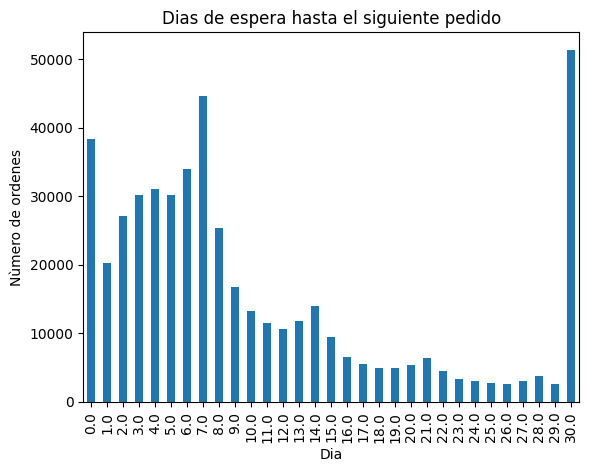

In [60]:
espera_pedidos.plot(
    kind='bar',
    title='Dias de espera hasta el siguiente pedido',
    xlabel= 'Dia',
    ylabel= 'Nùmero de ordenes'
)
plt.show()

Escribe aquí tus conclusiones
>Esta grafica significa que la mayoria de las personas esperan 30 dias para realizar una nueva compra . Aunque algunos tambien solo esperan 7 dias para volver a comprar. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [61]:
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [62]:
miercoles_filtro = orders['order_dow'] == 3

In [63]:
#Contar el numero de pedidos por hora del día 
ordenes_miercoles = orders[miercoles_filtro]['order_hour_of_day'].value_counts().sort_index()
ordenes_miercoles

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [64]:
sabado_filtro = orders['order_dow'] == 6

In [65]:
ordenes_sabado = orders[sabado_filtro]['order_hour_of_day'].value_counts().sort_index()
ordenes_sabado

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

In [66]:
miercoles_y_sabado= pd.concat([ordenes_sabado, ordenes_miercoles], axis=1)

In [67]:
miercoles_y_sabado.columns = ['Sabado', 'Miercoles']
miercoles_y_sabado

,Sabado,Miercoles
0,464,373
1,254,215
2,177,106
3,125,101
4,118,108
5,161,170
6,451,643
7,1619,1732
8,3246,3125
9,4311,4490


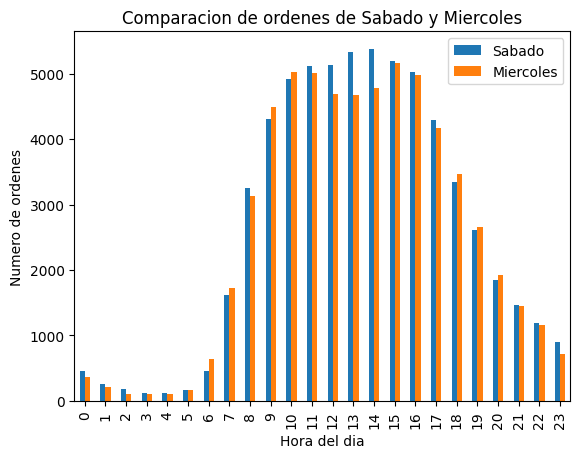

In [68]:
miercoles_y_sabado.plot(
    kind='bar',
    title='Comparacion de ordenes de Sabado y Miercoles', 
    xlabel='Hora del dia', 
    ylabel='Numero de ordenes'
)
plt.show()

Escribe aquí tus conclusiones
> Obtuvimos las ordenes del miercoles y sabado y las concatemanos por los indices de filas. Con el grafico podemos observar que los días sabados en las horas pico se incrementan las ordenes, mientras que los miercoles las ordenes disminuyen en dichos dias, puede ser porque es horario laboral o es hora de almuerzo y no tienen tiempo para ir comprar. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [69]:
ordenes_por_cliente = orders['user_id'].value_counts().sort_index()
ordenes_por_cliente

2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: user_id, Length: 157437, dtype: int64

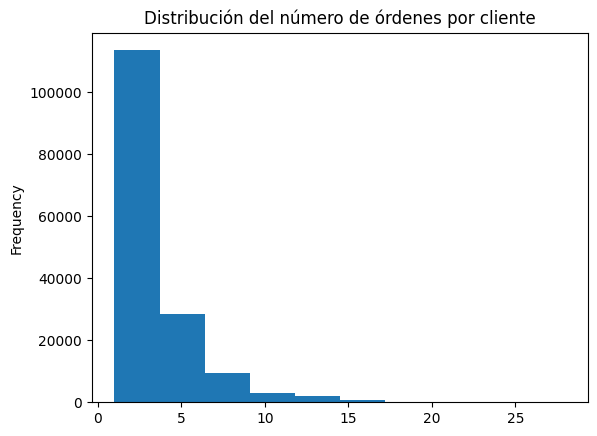

In [70]:
from matplotlib import pyplot as plt

ordenes_por_cliente.plot(
    kind='hist',
    title='Distribución del número de órdenes por cliente', 
    xlabel='Número de órdenes', 
    ylabel='Cantidad de clientes'
)
plt.show()

Escribe aquí tus conclusiones
>La gráfica muestra cómo se distribuyen los pedidos entre los clientes, es decir que muy pocos clientes hacen muchos pedidos y por lo tanto la mayoria de clientes realizan solo un pedido. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [71]:
productos_merge = order_products.merge(products)
productos_frecuencia = productos_merge[['product_id','product_name']].value_counts().sort_values(ascending=False).head(20)
productos_frecuencia 

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

Escribe aquí tus conclusiones
> Los 20 productos más populares son los productos que van con la tendencia de lo organico y lo saludable

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [72]:
total_productos_por_ordenes = order_products.groupby('order_id')['product_id'].count()

In [73]:
total_productos_por_ordenes

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [74]:
total_productos_por_ordenes.mean()

10.098983215049127

In [75]:
#Productos por cada orden 
total_productos_por_ordenes.value_counts().sort_index()

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

Escribe aquí tus conclusiones
>En promedio las personas compran 10 productos en cada orden 

In [76]:
Histograma_valores = total_productos_por_ordenes.value_counts().sort_index()

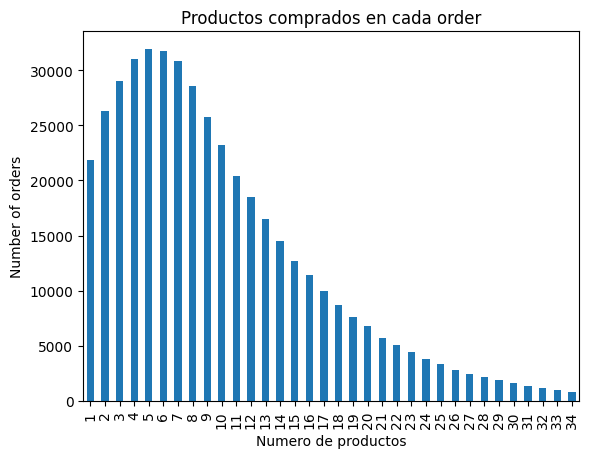

In [77]:
Histograma_valores[Histograma_valores.index < 35].plot(
    kind='bar',
    title='Productos comprados en cada order',
    xlabel='Numero de productos',
    ylabel='Number of orders'
)
plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [78]:
productos_vuelven_pedirse = productos_merge[productos_merge['reordered'] == 1][['product_id','product_name']].value_counts().sort_values(ascending=False).head(20)

In [79]:
productos_vuelven_pedirse

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

Escribe aquí tus conclusiones
>Los productos que se vuelven a pedir siguen siendo los productos organicos, lo que significa que los clientes de la empresa, son clientes que se preocupan por cuidar de su salud.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [80]:
# Calcular el número de productos pedidos por cada usuario
merged_data = orders.merge(order_products, on='order_id')
merged_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15.0,1503,17,0
4545003,2071924,1730,18,1,14,15.0,4778,12,1
4545004,2071924,1730,18,1,14,15.0,11512,1,1
4545005,2071924,1730,18,1,14,15.0,4920,6,1


In [88]:
# Calcular el número de pedidos que se vuelven a pedir por cada usuario
total_pedidos = merged_data.groupby('user_id')['product_id'].count()
total_pedidos

user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Name: product_id, Length: 149626, dtype: int64

In [89]:
total_pedidos.mean()

30.375783620493763

Escribe aquí tus conclusiones
>Esto significa que las personas si vuelven a pedir mas productos, en promedio 30 productos

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [82]:
merged_data = orders.merge(order_products)

In [83]:
tasa_reorden = merged_data.groupby('user_id')['reordered'].mean()
tasa_reorden

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

In [90]:
tasa_reorden.mean()

0.4948531736151642

Escribe aquí tus conclusiones
>Se puede observar con este análisis que en promedio las personas vuelven a consumir el 50% de los productos que ya habian pedido

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [84]:
# Filtrar los artículos que fueron añadidos primero en cada pedido
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]
primeros_productos

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


In [85]:
# Contar el número de veces que cada producto fue el primero en añadirse al carrito
primeros_productos_frecuencia = primeros_productos['product_id'].value_counts().head(20)
primeros_productos_frecuencia

24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: product_id, dtype: int64

In [86]:
# Unir con la tabla de productos para obtener los nombres
primeros_productos = primeros_productos_frecuencia.to_frame().merge(products, left_index=True, right_on='product_id')
primeros_productos[['product_id', 'product_name', 'product_id_y']]

,product_id,product_name,product_id_y
24851,24852,Banana,24852
13175,13176,Bag of Organic Bananas,13176
27844,27845,Organic Whole Milk,27845
21136,21137,Organic Strawberries,21137
47208,47209,Organic Hass Avocado,47209
21902,21903,Organic Baby Spinach,21903
47765,47766,Organic Avocado,47766
19659,19660,Spring Water,19660
16796,16797,Strawberries,16797
27965,27966,Organic Raspberries,27966


Escribe aquí tus conclusiones
>Sigue con la tendencia de los productos organicos

### Conclusion general del proyecto:

>Se puede concluir en el proyecto que la empresa Instacart tuvo dificiltades en el registro de pedidos el miercoles a las 2 am por lo que es importante detectar cual fue la causa del problema y trabajar para resolverlo.  Por otro lado es importante que la empresa mantenga una estandarizacion de los nombres de los productos, con el fin de poderlos analizar de manera optima. Ademas, es importante destacar que las personas realizan sus pedidos entre las 10am y 4:00 pm y en mayor frecuencia los domingos y lunes. Por otro lado, las personas esperan en volver a comprar de nuevo los productos 30 días. 
Por ultimo, se puede concluir que las personas realizan un solo pedido a la vez, en especial los productos organicos (Banana y Bag of Organic Bananas) y con frecuencia las personas piden los mismos productos en cada orden.

<div class="alert alert-block alert-success">
<b>Comentario del Revisor para el Paso 3: Análisis de los Datos</b> <a class="tocSkip"></a>

### Resumen de Evaluación:

#### Sección A (Fácil):

- **Verificación de valores en 'order_hour_of_day' y 'order_dow':** Correcto
- **Gráfico de pedidos por hora del día:** Correcto
- **Gráfico de compras por día de la semana:** Correcto
- **Gráfico de tiempo entre pedidos:** Correcto

#### Sección B (Intermedio):

- **Comparación de distribuciones entre miércoles y sábados:** Correcto
- **Distribución de número de órdenes por cliente:** Correcto
- **Top 20 productos más frecuentemente pedidos:** Correcto

#### Sección C (Difícil):

- **Distribución de artículos por pedido:** Correcto
- **Top 20 artículos más frecuentemente reordenados:** Correcto
- **Tasa de repetición de pedido por producto:** Incorrecto - No se calculó la tasa de repetición por producto como se solicitó
- **Tasa de repetición de pedido por usuario:** Correcto
- **Top 20 artículos puestos primero en los carritos:** Correcto

### Feedback Detallado:

Has realizado un análisis sólido de los datos en la mayoría de las áreas. Tus visualizaciones son claras y efectivas, y tus conclusiones demuestran una buena comprensión de los patrones en los datos.

#### Puntos Fuertes:

- Excelente uso de diferentes tipos de gráficos para visualizar los datos.
- Buenas observaciones sobre los patrones de compra por hora y día de la semana.
- Análisis detallado de los productos más populares y frecuentemente reordenados.

#### Áreas de Mejora:

- En la pregunta C3, no calculaste la tasa de repetición de pedido por producto como se solicitó. En su lugar, calculaste el número promedio de productos pedidos por usuario.
- En algunas secciones, podrías haber profundizado más en las implicaciones de tus hallazgos para el negocio.
- Considera usar más estadísticas descriptivas para respaldar tus conclusiones visuales.

Tu conclusión general del proyecto es buena, pero podrías haber sintetizado más los hallazgos clave de todas las secciones.

En general, has demostrado una buena capacidad para analizar datos complejos y extraer insights significativos, aunque hay espacio para mejorar en algunas áreas específicas.


¡Buen trabajo! ¡Sigue adelante con el siguiente sprint! 🚀😊
</div>
